Markov chains:  Galton-Watson process

In [4]:
import numpy as np
import random as rm
import matplotlib.pyplot as plt

import time


# define the state space of a bacteria: we have 3 states, either split in two, stay the same or die (2, 0, 1)
# SIMULATION
# p offpring distribution
# zo initial state
# n_exit: if it survive until this point, it will break the loop
# z_n vector of our states

def simulate_growth(z0, p, n_exit):
    
    # n_exit: an exit length of life expectancy (just to estimate the extinction probability)
    
    # expected number of offspring from an individual (we know that EX = 1, can also check)
     ex_offspring_ind = []
     # the offspring process
     z_n = [z0]
    
     i = 1
    # here, p is the vector p = (p0, p1, p2) of probabilities to die, stay the same or split
     while 1:
         # vector
         # here we count the total number off offspring at instance i 
         all_offspring_current_n = 0
         # here is the number of offspring we had previously (remember it's an MC so that's all we need to know!)
         total_prev_offspring = z_n[i-1]
         # for each of the offspring in previous generartion, generate a new offspring 
         for cur_offspring in range(total_prev_offspring):
             next_offspring = np.random.choice(np.arange(0, 3), p=p) # it can be poisson, binomial...
             ex_offspring_ind.append(next_offspring)
             # and count them in into the total number offspring at the current state
             all_offspring_current_n += next_offspring
         # the current instance of Z_n is the total number of offspring
         z_n.append(all_offspring_current_n)
         

         # if no offspring produced, we extinct
         if all_offspring_current_n == 0:
             print('Your population died out after ', i, 'generations')
             break
         # if we've been running the simulation for far too long, we exit
         if i >= n_exit:
             print('Your population survived after ', i, 'generations')
             break
         
         i += 1
               
     return [z_n, ex_offspring_ind]
        

In [360]:
import matplotlib.pyplot as plt

p_offspring = [1/3, 1/3, 1/3]
# probability[split in two,stay,die]
# n_exit = infinity
process_instant = simulate_growth(1, p_offspring, np.Infinity)

print(process_instant[0])


Your population died out after  28 generations
[1, 2, 2, 2, 3, 4, 3, 4, 5, 4, 3, 4, 7, 8, 6, 7, 6, 9, 10, 7, 3, 4, 4, 5, 5, 6, 4, 1, 0]


In [ ]:
np.mean(process_instant[1])


0.9922480620155039

Calculate the expected lifetime of the population

Your population died out after  397 generations
Your population died out after  6 generations
Your population died out after  5 generations
Your population died out after  1 generations
Your population died out after  8 generations
Your population died out after  34 generations
Your population died out after  2 generations
Your population died out after  22 generations
Your population died out after  1 generations
Your population died out after  3 generations
Your population died out after  2 generations
Your population died out after  2 generations
Your population died out after  1 generations
Your population died out after  3 generations
Your population died out after  11 generations
Your population died out after  1 generations
Your population died out after  2 generations
Your population died out after  4 generations
Your population died out after  1 generations
Your population died out after  1 generations
Your population died out after  1 generations
Your population died out afte

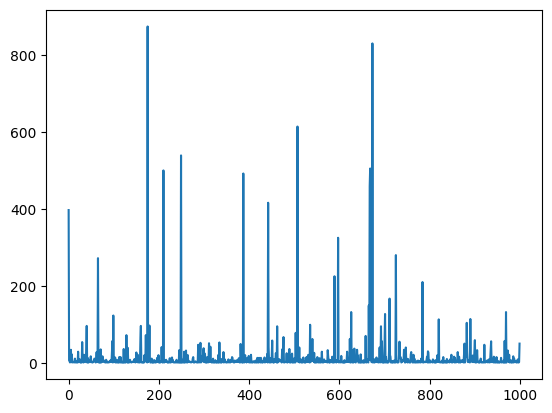

In [362]:
# ESTIMATE THE LIFETIME OF THE POPULATION
# keep all obtained life times
n_lifetime = []

p_offspring = [1/3, 1/3, 1/3]

# now repeat the simulation k = 1000 times
k = 1000

offspring_number = []

for i in range(k):
    cur_population = simulate_growth(1, p_offspring, np.Infinity)
    n_lifetime.append(len(cur_population[0]))
    offspring_number.append(np.mean(cur_population[0]))
    

print('Estimated life expectancy is ', np.mean(n_lifetime))
print('Mean offspring number for each generation is ', np.mean(offspring_number))
plt.plot(n_lifetime)
plt.show()


Let's change the offspring probabilities so that EX < 1. For example, take p = [1/2, 1/4, 1/4]. Then EX = 3/4. Let's estimate the extinction probability after 10000 steps

In [8]:
n_lifetime = []

# now repeat the simulation k = 1000 times
k = 10

# simulation length
sim_len = 1000

p_offspring = [1/3, 1/3, 1/3] # SMALLER THAN 1
#p_offspring = [0.3, 0.3, 0.4] # BIGGER THAN 1
#p_offspring = [0.5, 0.25, 0.25] # EXACTLY 1 ---> EXACTLY 1 THE RESULT (PROBABILITY)

offspring_number = []

# vector of indicators if the populations died before 1000 steps
died_before_sim_len = []

for i in range(k):
    cur_population = simulate_growth(1, p_offspring, sim_len)
    if(len(cur_population[0]) < sim_len):
        died_before_sim_len.append(1)
    else:
        died_before_sim_len.append(0)
    n_lifetime.append(len(cur_population[0]))
    offspring_number.append(np.mean(cur_population[0]))
    
    
print('Estimated life expectancy is ', np.mean(n_lifetime))
print('Mean offspring number for each generation is ', np.mean(offspring_number))


Your population died out after  1 generations
Your population died out after  2 generations
Your population died out after  3 generations
Your population died out after  8 generations
Your population died out after  77 generations
Your population died out after  10 generations
Your population died out after  3 generations
Your population died out after  1 generations
Your population died out after  1 generations
Your population died out after  2 generations
Estimated life expectancy is  11.8
Mean offspring number for each generation is  1.3691142191142194


In [10]:
print('Extinction probability is ', np.mean(died_before_sim_len))

offspring_number

#died_before_sim_len

Extinction probability is  1.0


[0.5,
 0.6666666666666666,
 1.0,
 1.6666666666666667,
 4.948717948717949,
 1.9090909090909092,
 1.0,
 0.5,
 0.5,
 1.0]

Plotting trees with anytree package

In [371]:
from anytree import Node, RenderTree

# create the main node
main_node = Node("Node0")
# add children
child1 = Node("Child1", parent=main_node)
child2 = Node("Child2", parent=main_node)
# add subchildren
subchild1 = Node("Subchild1", parent=child1)
subchild2 = Node("Subchild2", parent=child2)
subchild3 = Node("Subchild3", parent=child2)

##### print the tree we created:
for pre, fill, node in RenderTree(main_node):
    print("%s%s" % (pre, node.name))


Node0
├── Child1
│   └── Subchild1
└── Child2
    ├── Subchild2
    └── Subchild3


Now do this for our problem: (very technical)


In [ ]:
# try plotting trees
from anytree import Node, RenderTree
import random
import numpy as np


z0 = 1
p = [1/3, 1/3, 1/3]

n_exit = 7
# define an exit length of life expectancy (just to estimate the extinction probability)

# expected number of offspring from an individual (we know that EX = 1, can also check)
ex_offspring_ind = []
# the offspring process
z_n = [z0]
# Create head node
z_0_node = Node("Z0")

# an integer counter of all nodes in the graph
counts_all_nodes = 1
# vector were we keep all the nodes
all_nodes_list = [z_0_node]
i = 1

while 1:
    # vector
    # here we count the total number off offspring at instance i 
    all_offspring_current_n = 0
    # here is the number of offspring we had previously (remember it's an MC so that's all we need to know!)
    total_prev_offspring = z_n[i-1]
    # for each of the offspring in previous generation, generate a new offspring 
    cur_nodes_list = []
    for cur_offspring in range(total_prev_offspring):
        # np.random.seed(10) (always the same number)
        np.random.seed(i) # different seed for each generation
        next_offspring = np.random.choice(np.arange(0, 3), p=p)
        # add nodes
        for cur_node in range(next_offspring):
            if len(all_nodes_list) == 1:
                cur_nodes_list.append(Node("X"+str(counts_all_nodes), parent=all_nodes_list[cur_offspring]))
            else:
                cur_nodes_list.append(Node("X"+str(counts_all_nodes), parent=all_nodes_list[(len(all_nodes_list)-1)][cur_offspring]))
            
            counts_all_nodes += 1
            
        ex_offspring_ind.append(next_offspring)
        # and count them in into the total number offspring at the current state
        all_offspring_current_n += next_offspring
    # the current instance of Z_n is the total number of offspring
    z_n.append(all_offspring_current_n)
    
    if len(cur_nodes_list) > 0:
        all_nodes_list.append(cur_nodes_list)

    # if no offspring produced, we extinct
    if all_offspring_current_n == 0:
        print('Your population died out after ', i, 'generations')
        break
    # if we've been running the simulation for far too long, we exit
    if i >= n_exit:
        print('Your population survived after ', i, 'generations')
        break
    
    i += 1




Your population survived after  7 generations


In [394]:
for pre, fill, node in RenderTree(z_0_node):
    print("%s%s" % (pre, node.name))
    
print(z_n)

Z0
├── X1
│   ├── X3
│   │   └── X5
│   │       └── X6
│   │           └── X7
│   │               ├── X8
│   │               └── X9
│   │                   ├── X10
│   │                   └── X11
│   └── X4
└── X2
[1, 2, 2, 1, 1, 1, 2, 2]


Let's make a plot of this tree using UniqueDotExporter from the same anytree package

In [13]:

    
from anytree.exporter import UniqueDotExporter
from PIL import Image

pic_name = 'z_n_visual.png'
# graphviz needs to be installed for the next line!
UniqueDotExporter(z_0_node).to_picture(pic_name) # create the file, and it is loaded in my directory
#Image.open(pic_name, mode='r')



ModuleNotFoundError: No module named 'anytree'

In [396]:
# open the picture
import webbrowser
webbrowser.open(pic_name)

# another option: from the terminal using explorer.exe 


True

Markov chains: some work with text!

In [15]:
#import numpy as np

# first, read the text file
# change encoding to utf-8-sig, otherwise it will add a Byte order mark (BOM, a unicode symbol) in the beginning of the file!
with open('pride_and_prejudice.txt',mode='r',  encoding='utf-8-sig') as f:
    book = f.read()
    
print(book)

FileNotFoundError: [Errno 2] No such file or directory: 'pride_and_prejudice.txt'

In [399]:
# we can take letters
letters = [l.lower() for l in book if l.isalpha()]

# take words: define our markov chain
# and make capital letters lowercase
words = book.lower().split()

#normal_string="".join(ch for ch in book if ch.isalnum())
# make it a dictionary:
normal_words = []

# remove special character from the book
for cur_word in words:
    if cur_word.isalnum():
        normal_words.append(cur_word)


In [400]:
from collections import OrderedDict

# take a look:
print(normal_words[:100])

# define the vector of states (unique words)
# use this and not SET to preserve the order! 
states = list(OrderedDict.fromkeys(normal_words).keys())

print(len(normal_words))
print(len(states))
states


['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'by', 'jane', 'austen', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'you', 'may', 'copy', 'give', 'it', 'away', 'or', 'it', 'under', 'the', 'terms', 'of', 'the', 'project', 'gutenberg', 'license', 'included', 'with', 'this', 'ebook', 'or', 'online', 'at', 'pride', 'and', 'prejudice', 'jane', 'austen', 'posting', 'august', '2008', 'release', '1998', 'last', 'march', '2018', 'english', 'character', 'set', 'start', 'of', 'this', 'project', 'gutenberg', 'ebook', 'pride', 'and', 'prejudice', 'produced', 'by', 'anonymous', 'volunteers', 'pride', 'and', 'prejudice', 'by', 'jane', 'austen', 'chapter', '1', 'it', 'is', 'a', 'truth', 'universally', 'that', 'a', 'single', 'man', 'in', 'possession', 'of', 'a']
103272
5700


['the',
 'project',
 'gutenberg',
 'ebook',
 'of',
 'pride',
 'and',
 'by',
 'jane',
 'austen',
 'this',
 'is',
 'for',
 'use',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'with',
 'almost',
 'restrictions',
 'you',
 'may',
 'copy',
 'give',
 'it',
 'away',
 'or',
 'under',
 'terms',
 'license',
 'included',
 'online',
 'prejudice',
 'posting',
 'august',
 '2008',
 'release',
 '1998',
 'last',
 'march',
 '2018',
 'english',
 'character',
 'set',
 'start',
 'produced',
 'anonymous',
 'volunteers',
 'chapter',
 '1',
 'a',
 'truth',
 'universally',
 'that',
 'single',
 'man',
 'in',
 'possession',
 'good',
 'must',
 'be',
 'want',
 'however',
 'little',
 'known',
 'feelings',
 'views',
 'such',
 'on',
 'his',
 'first',
 'entering',
 'so',
 'well',
 'fixed',
 'minds',
 'surrounding',
 'he',
 'considered',
 'rightful',
 'property',
 'some',
 'one',
 'other',
 'their',
 'dear',
 'said',
 'lady',
 'to',
 'him',
 'heard',
 'netherfield',
 'park',
 'let',
 'bennet',
 'replied',
 'had',
 're

Now estimate the transition matrix for each state

In [403]:
# enumrate the states
labs = np.arange(0, len(states))

# turn the sequence of words into a sequence of integers, and map them together into a dictionary
res = {states[i]: labs[i] for i in range(len(labs))}

print(res.values())
res.keys()


dict_values([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

dict_keys(['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'by', 'jane', 'austen', 'this', 'is', 'for', 'use', 'anyone', 'anywhere', 'at', 'no', 'cost', 'with', 'almost', 'restrictions', 'you', 'may', 'copy', 'give', 'it', 'away', 'or', 'under', 'terms', 'license', 'included', 'online', 'prejudice', 'posting', 'august', '2008', 'release', '1998', 'last', 'march', '2018', 'english', 'character', 'set', 'start', 'produced', 'anonymous', 'volunteers', 'chapter', '1', 'a', 'truth', 'universally', 'that', 'single', 'man', 'in', 'possession', 'good', 'must', 'be', 'want', 'however', 'little', 'known', 'feelings', 'views', 'such', 'on', 'his', 'first', 'entering', 'so', 'well', 'fixed', 'minds', 'surrounding', 'he', 'considered', 'rightful', 'property', 'some', 'one', 'other', 'their', 'dear', 'said', 'lady', 'to', 'him', 'heard', 'netherfield', 'park', 'let', 'bennet', 'replied', 'had', 'returned', 'long', 'has', 'just', 'been', 'she', 'told', 'me', 'all', 'about', 'made', 'not

Now make a method for mapping the words into integers

In [404]:
def map_words_into_integers(normal_words):
    mapped_words = []

    for cur_word in normal_words:
        cur_ind = list(res.keys()).index(cur_word)
        mapped_words.append(list(res.values())[cur_ind])
        
    return mapped_words

and define a method to create transition matrix

In [408]:
def transition_matrix(chain_seq):
    # define number of states
    n = 1+ max(chain_seq) 
    # create an empty nXn matrix, which we will fill in
    M = np.zeros((n,n))
    # zip is a useful method for working with matrices
    # for each states, we add up to a matrix whenever we find this state in the sequence 
    for (i,j) in zip(chain_seq,chain_seq[1:]):
        M[i][j] += 1

    #now convert to probabilities:
    M = M/M.sum(axis=1, keepdims=True)
    return M

test the function: first, make integers out of words (might take a while)

In [405]:
# test the function: first, make integers out of words (might take a while)

words_mapped = map_words_into_integers(normal_words)



In [406]:
# check

print(normal_words[:20])
print(words_mapped[:20])

print(list(res.keys()))
print(list(res.values()))


['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'by', 'jane', 'austen', 'this', 'ebook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'at']
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 3, 11, 12, 0, 13, 4, 14, 15, 16]
['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'by', 'jane', 'austen', 'this', 'is', 'for', 'use', 'anyone', 'anywhere', 'at', 'no', 'cost', 'with', 'almost', 'restrictions', 'you', 'may', 'copy', 'give', 'it', 'away', 'or', 'under', 'terms', 'license', 'included', 'online', 'prejudice', 'posting', 'august', '2008', 'release', '1998', 'last', 'march', '2018', 'english', 'character', 'set', 'start', 'produced', 'anonymous', 'volunteers', 'chapter', '1', 'a', 'truth', 'universally', 'that', 'single', 'man', 'in', 'possession', 'good', 'must', 'be', 'want', 'however', 'little', 'known', 'feelings', 'views', 'such', 'on', 'his', 'first', 'entering', 'so', 'well', 'fixed', 'minds', 'surrounding', 'he', 'considered', 'rightful', 'property', 'some'

In [407]:
len(words_mapped)



103272

Now compute the transition matrix

In [409]:
p_words = transition_matrix(words_mapped)

# check the sum across rows, should be one!
p_words.sum(axis=1)

array([1., 1., 1., ..., 1., 1., 1.])

In [410]:
# print the matrix in a more fancy way
#for row in p_words: print(' '.join(f'{x:.10f}' for x in row))
p_words[np.nonzero(p_words)]

array([0.01294643, 0.00691964, 0.00401786, ..., 1.        , 1.        ,
       1.        ])

Compute the probabilty of going form state "the" to "her"

In [ ]:
ind1 = list(res.keys()).index('the')
ind2 = list(res.keys()).index('her')

print(ind1)
print(ind2)

print(states[ind1])
print(states[ind2])

# the probability of going from THE to HER we take directly from the matrix 
print(p_words[ind1, ind2])

# some other examples of the words
ind_his = list(res.keys()).index('his')
ind_wife = list(res.keys()).index('wife')

p_words[ind_his, ind_wife]

0
196
the
her
0.0026785714285714286


0.012096774193548387

Can also estimate the expected number of steps required to go from "the" to "her"

In [430]:
## first, find all indices of "her" and "the" in the sequence
#starts = [i for i, x in enumerate(words_mapped) if x == ind1]
#ends   = [i for i, x in enumerate(words_mapped) if x ==ind2]

## now take the length of ALL subsets WITH these indicies
#all_subsets_required_states = [len(words_mapped[start:end+1]) for start,end in zip(starts, ends)]
########3 this does not keep the order! Try this:

# define a function that takes a vector of integers, start index and end index, and finds all
# subsequence between these indices 
def get_length_all_sequences(seq, ind1, ind2):
    # set a count of steps
    count = 0
    # set a flag
    fl = 0
    # keep the length of all sequences between "The" and "Her"
    sequence_length = []
    for i in seq:
        if i == ind1:
            fl = 1
        elif i == ind2:
            fl = 0
            sequence_length.append(count)
            count = 0
        # if flag is on, i count words
        if fl: 
            count+= 1
    return sequence_length



In [432]:
ind1 = list(res.keys()).index('the')
ind2 = list(res.keys()).index('her')

# and compute the mean
sequence_length = get_length_all_sequences(words_mapped,ind1, ind2)
np.mean(sequence_length)


36.92529623905204

<function matplotlib.pyplot.show(close=None, block=None)>

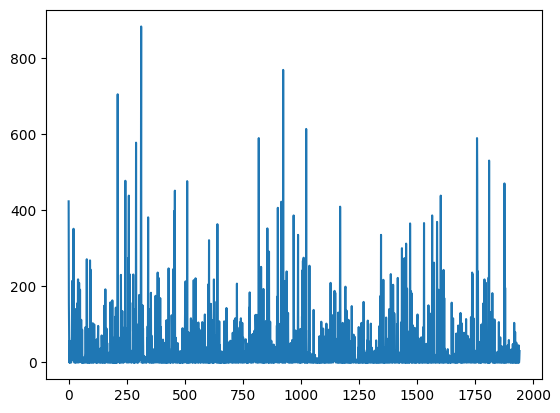

In [434]:
plt.plot(sequence_length)
plt.show

Note: you can also generate samplings of your own text using the estimated probability matrix! 